In [1]:
import os
from copy import deepcopy

import cv2
from doctr.models import detection_predictor
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
text_detector = detection_predictor(arch='db_resnet50', pretrained=True)
text_detector.eval()

text_detector_1 = detection_predictor(arch='db_resnet50', pretrained=True)
checkpoint = torch.load("models/db_resnet50_20220719-081112_last.pt", map_location='cpu')
text_detector_1.model.load_state_dict(checkpoint)
text_detector_1.eval()

print()

/Users/anastasiabogatenkova/work/TextDetection/venv/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [3]:
def get_bboxes(img, model):
    out = model([img])
    h, w, _ = img.shape
    bboxes = [(int(box[0] * w), int(box[1] * h), int(box[2] * w), int(box[3] * h)) for box in out[0]]
    return bboxes

In [18]:
def draw_results(base_text_detector, new_text_detector, in_dir, out_dir):
    for img_name in tqdm(os.listdir(in_dir)):
        if not img_name[0].isdigit():
            continue

        img = cv2.imread(os.path.join(in_dir, img_name))
        img_with_lines = deepcopy(img)

        base_bboxes = get_bboxes(img, base_text_detector)
        new_bboxes = get_bboxes(img, new_text_detector)
        for bbox in base_bboxes:
            img_with_lines = cv2.rectangle(img_with_lines, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 0, 255), 2)
        for bbox in new_bboxes:
            img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 0, 255), 2)
        plt.axis('off')
        fig, ax = plt.subplots(1, 2)
        fig.set_figheight(10)
        fig.set_figwidth(15)

        ax[0].set_title("Before")
        ax[0].axes.xaxis.set_ticklabels([])
        ax[0].axes.yaxis.set_ticklabels([])
        ax[0].imshow(img_with_lines)

        ax[1].set_title("After")
        ax[1].axes.xaxis.set_ticklabels([])
        ax[1].axes.yaxis.set_ticklabels([])
        ax[1].imshow(img)
        plt.savefig(os.path.join(out_dir, f"{img_name}.jpg"))
        plt.close(fig)

100%|██████████| 60/60 [08:44<00:00,  8.74s/it]


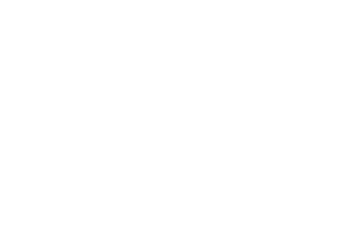

In [19]:
draw_results(text_detector, text_detector_1, "actual_data/val", "actual_data/last_val")

100%|██████████| 60/60 [08:57<00:00,  8.96s/it]


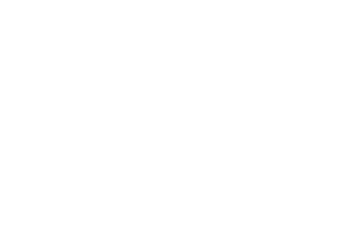

In [20]:
text_detector_2 = detection_predictor(arch='db_resnet50', pretrained=True)
checkpoint = torch.load("models/db_resnet50_20220718-134326.pt", map_location='cpu')
text_detector_2.model.load_state_dict(checkpoint)
text_detector_2.eval()
draw_results(text_detector, text_detector_2, "actual_data/val", "actual_data/best_val")


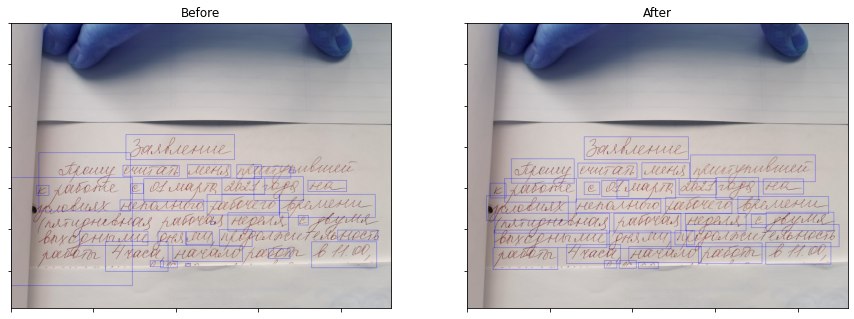

In [21]:
img = cv2.imread("actual_data/images/016.jpg")
img_with_lines = deepcopy(img)

base_bboxes = get_bboxes(img, text_detector)
new_bboxes = get_bboxes(img, text_detector_1)
for bbox in base_bboxes:
    img_with_lines = cv2.rectangle(img_with_lines, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 0, 255), 2)
for bbox in new_bboxes:
    img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 0, 255), 2)
fig, ax = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].set_title("Before")
ax[0].axes.xaxis.set_ticklabels([])
ax[0].axes.yaxis.set_ticklabels([])
ax[0].imshow(img_with_lines)

ax[1].set_title("After")
ax[1].axes.xaxis.set_ticklabels([])
ax[1].axes.yaxis.set_ticklabels([])
ax[1].imshow(img)

100%|██████████| 30/30 [03:53<00:00,  7.80s/it]


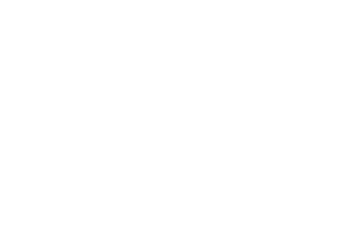

In [22]:
draw_results(text_detector, text_detector_1, "actual_data/stamps", "actual_data/stamps_result")

100%|██████████| 30/30 [03:44<00:00,  7.49s/it]


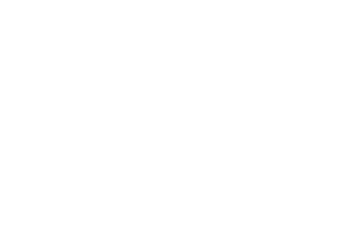

In [23]:
draw_results(text_detector, text_detector_1, "actual_data/stamps_binarized", "actual_data/stamps_result")

